# *Première étape - le data cleaning*
- Ces étapes ont été préparées **après nos analyses** à partir du template d'exploration de données
- Importation des premiers modules
- Suppression des colonnes faisant doublons avec l'index incrément
- Suppression des lignes avec des valeurs manquantes
- Passage de l'identifiant, unique, en index
- Suppression des doublons complets 

In [1]:
# importation des premiers modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)

In [2]:
# importation des fichiers du jeux de données et création de deux dataframes

X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train_saegPGl.csv')


In [3]:
# fusion des deux datafames crées avec la clé identifiant

df=y_train.merge(X_train, on='Identifiant')

In [4]:
# affichage du format de la base

df.shape

(10229, 28)

In [5]:
# suppression des colonnes Unnamed 

df=df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

In [6]:
df.head()

,Identifiant,target,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,0,2014,1,0,V,N,1,O,1,O,N,N,N,N,AUTRE,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,3877,1,2014,1,0,V,V,V,V,V,V,V,V,V,V,V,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,4942,0,2013,1,1,V,V,V,V,V,V,V,V,V,V,V,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,13428,0,2013,"0,246575342",0,N,V,V,V,V,V,V,V,V,V,V,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,17137,0,2015,1,0,V,N,2,O,1,O,N,N,O,N,AUTRE,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


In [7]:
# calcul des proportions de valeurs manquantes

df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
df_null[df_null['Count'] > 0]

,Count,Percent
superficief,119,1.163359
ft_22_categ,1236,12.083293
Insee,115,1.124255


In [8]:
#suppression des valeurs manquantes

df.dropna(inplace=True)
df.shape

(8878, 26)

In [9]:
# passage de l'identifiant en index (l'identification est unique)

df=df.set_index('Identifiant')

In [10]:
# recherche des doublons complets

test=df[df.iloc[:,:].duplicated()==True]
print(test.shape)

(21, 25)


In [11]:
# suppression des doublons complets

df.drop_duplicates(inplace=True)
df.shape

(8857, 25)

In [12]:
# suppression des doublons hors target

df.drop_duplicates(subset=df.columns[1:],inplace=True)
df.shape

(8849, 25)

In [13]:
# visualisation des informations de base du dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8849 entries, 18702 to 8817
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       8849 non-null   int64  
 1   ft_2_categ   8849 non-null   int64  
 2   EXPO         8849 non-null   object 
 3   ft_4_categ   8849 non-null   int64  
 4   ft_5_categ   8849 non-null   object 
 5   ft_6_categ   8849 non-null   object 
 6   ft_7_categ   8849 non-null   object 
 7   ft_8_categ   8849 non-null   object 
 8   ft_9_categ   8849 non-null   object 
 9   ft_10_categ  8849 non-null   object 
 10  ft_11_categ  8849 non-null   object 
 11  ft_12_categ  8849 non-null   object 
 12  ft_13_categ  8849 non-null   object 
 13  ft_14_categ  8849 non-null   object 
 14  ft_15_categ  8849 non-null   object 
 15  ft_16_categ  8849 non-null   object 
 16  ft_17_categ  8849 non-null   object 
 17  ft_18_categ  8849 non-null   object 
 18  ft_19_categ  8849 non-null   int64  
 19  su

# *Deuxième étape - la mise en bonne forme des données*

- Ces étapes sont aussi tirées par nos explorations de données et des hypothèses formulées sur ce que pourraient être certaines colonnes anonymisées 
- Conversion des "fausses" numériques en catégorielles : FT_2, FT_4, FT_19, FT_21 
- Conversion des "fausses" Object en numérique : EXPO
- Conversion des années de construction en decennie avec conversion en catégorielle
- Suppression de la ft_16, identique à la ft_15
- Suppression de la ft_22 remplacable par la decennie

In [14]:
# conversion des fausses numériques en object

df[['ft_2_categ', 'ft_4_categ', 'ft_19_categ','ft_21_categ']]= df[['ft_2_categ','ft_4_categ', 
                                                                   'ft_19_categ','ft_21_categ']].astype(str)
# conversion d'EXPO en float

df['EXPO']=df['EXPO'].str.replace(',', '.').astype(float)

# création de la catégorielle décennie à partir de FT_22, supposée année de construction

df['ft_22_categ']=df['ft_22_categ'].astype('int')
def todecade(y):
    return str(y)[:3] + '0'
df["decennie"] = df["ft_22_categ"].apply(todecade)
df['decennie']=df['decennie'].astype('str')

# suppression des ft_16 et ft_22

df=df.drop(['ft_16_categ', 'ft_22_categ'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8849 entries, 18702 to 8817
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       8849 non-null   int64  
 1   ft_2_categ   8849 non-null   object 
 2   EXPO         8849 non-null   float64
 3   ft_4_categ   8849 non-null   object 
 4   ft_5_categ   8849 non-null   object 
 5   ft_6_categ   8849 non-null   object 
 6   ft_7_categ   8849 non-null   object 
 7   ft_8_categ   8849 non-null   object 
 8   ft_9_categ   8849 non-null   object 
 9   ft_10_categ  8849 non-null   object 
 10  ft_11_categ  8849 non-null   object 
 11  ft_12_categ  8849 non-null   object 
 12  ft_13_categ  8849 non-null   object 
 13  ft_14_categ  8849 non-null   object 
 14  ft_15_categ  8849 non-null   object 
 15  ft_17_categ  8849 non-null   object 
 16  ft_18_categ  8849 non-null   object 
 17  ft_19_categ  8849 non-null   object 
 18  superficief  8849 non-null   float64
 19  ft

# *Troisième étape -  l'exploration graphique des données*

#1: courbes de distribution des numériques (ou assimilée)

#2: répartition des occurences des catégorielles

#3: mise en évidence des liens entre variables

#4: mise en évidence des liens entre variables et target

# #1

0    0.77
1    0.23
Name: target, dtype: float64


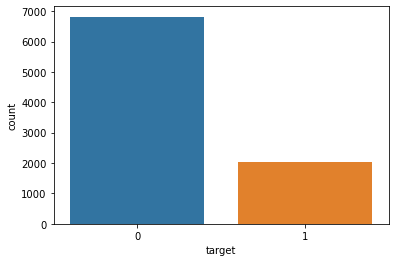

In [144]:
# répartition de la target

sns.countplot(data=df, x='target')
print(df['target'].value_counts(normalize=True).round(2));

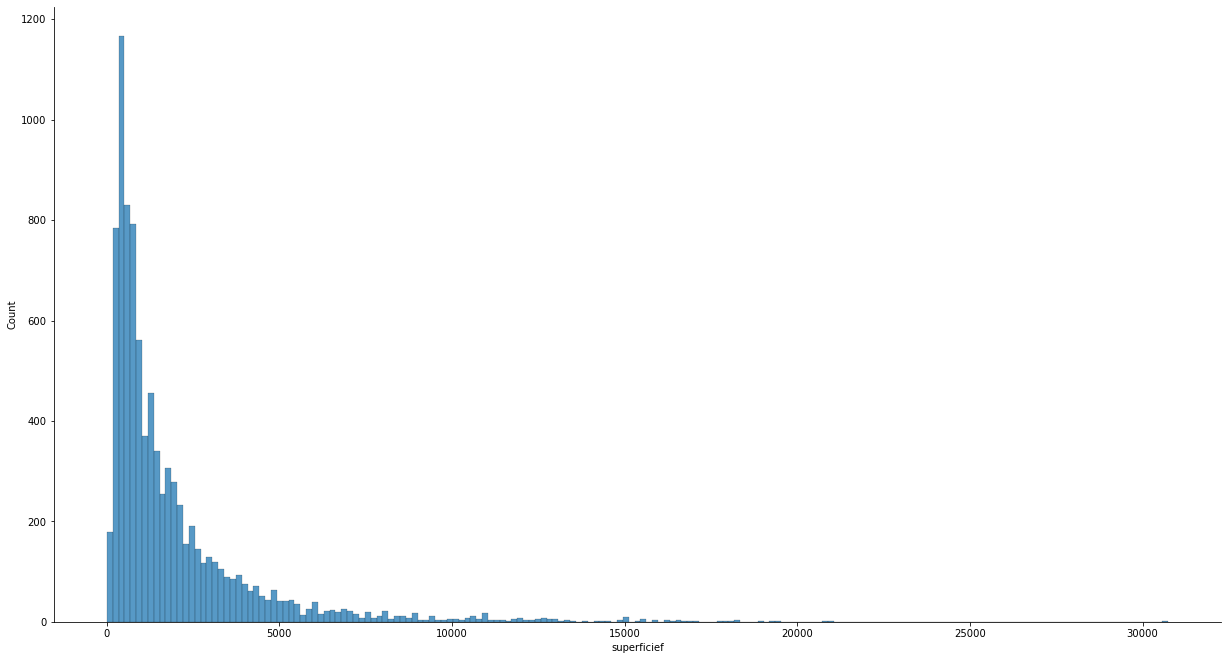

In [145]:
# courbe de distribution des numériques: la superficie

sns.displot(df['superficief']);
plt.gcf().set_size_inches(20, 10);


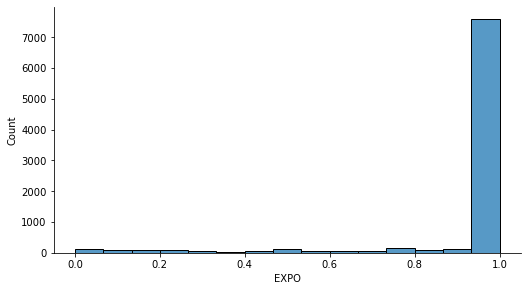

In [146]:
# courbe de distribution des numériques: l'EXPO

sns.displot(df['EXPO']);
plt.gcf().set_size_inches(8, 4);

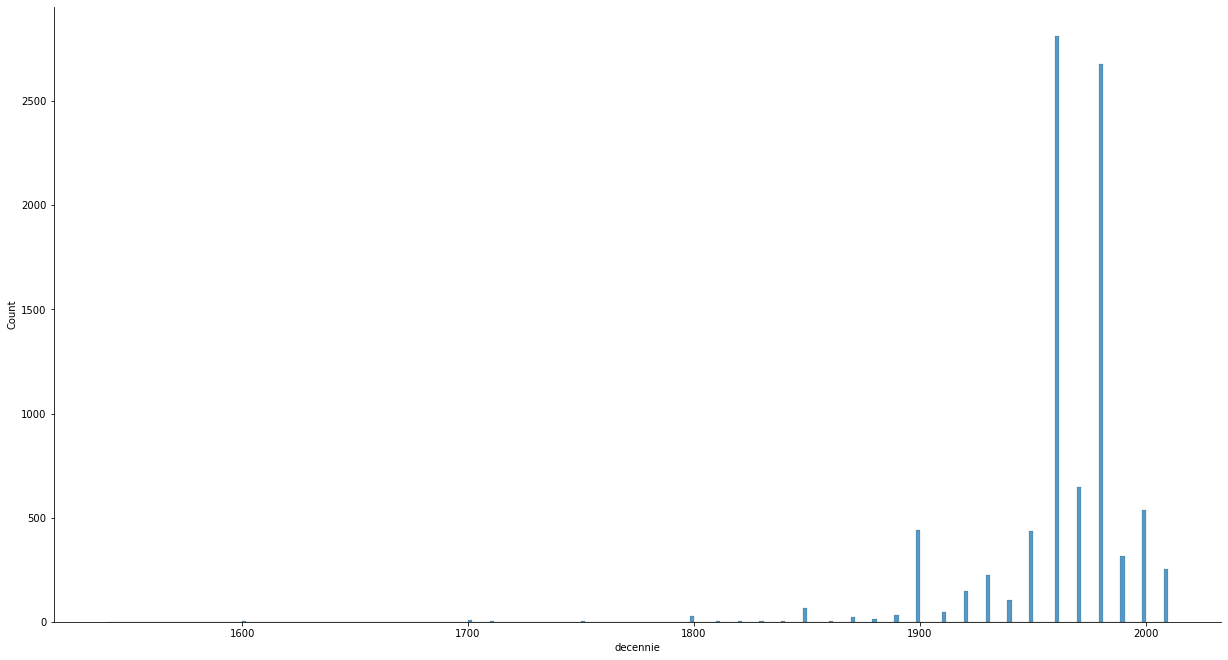

In [147]:
# distribution de la nouvelle variable decennie (assimilée numérique)

sns.displot(df['decennie'].astype('int'));
plt.gcf().set_size_inches(20, 10);

# #2

In [148]:
# Analyse des variables qualitatives anonymes, avec affichage des valeurs possibles

for col in df.select_dtypes('object').drop(['Insee'],axis=1):
    print(f'{col:-<15}{df[col].unique()}')

ft_2_categ-----['2014' '2015' '2016' '2013' '2012']
ft_4_categ-----['0' '1']
ft_5_categ-----['V' 'N' 'O']
ft_6_categ-----['N' 'V' 'O']
ft_7_categ-----['1' 'V' '2' '3']
ft_8_categ-----['O' 'V' 'N']
ft_9_categ-----['1' 'V' '2' '3']
ft_10_categ----['O' 'V' 'N']
ft_11_categ----['N' 'V' 'O']
ft_12_categ----['N' 'V' 'O']
ft_13_categ----['N' 'V' 'O']
ft_14_categ----['N' 'V' 'O']
ft_15_categ----['AUTRE' 'V']
ft_17_categ----['V' 'N' 'O']
ft_18_categ----['base' 'effpi' 'pi' 'eff' 'V']
ft_19_categ----['2' '1']
ft_21_categ----['4' '2' '1' '3']
ft_23_categ----['0.0' '0.3' '0.6' '1.0' '2.0' '1.5']
ft_24_categ----['   2' '   .' '   4' '   3' '   5' '   8' '>=10' '   1' '   6' '   7'
 '   9']
decennie-------['2010' '1980' '1970' '1960' '1930' '1950' '1940' '1990' '2000' '1920'
 '1910' '1900' '1870' '1890' '1850' '1800' '1880' '1830' '1610' '1700'
 '1750' '1820' '1810' '1840' '1860' '1600' '1550' '1780' '1710' '1540']


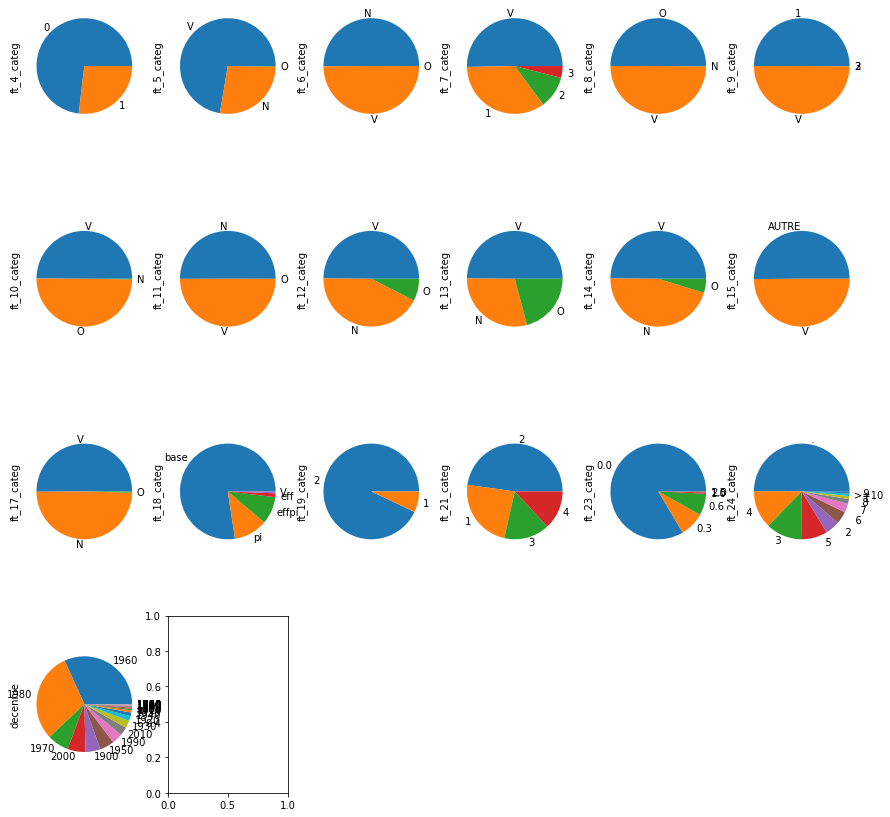

In [149]:
# Analyse des variables qualitatives anonymes, avec répartition des valeurs possibles

plt.figure(figsize=(15,15))
count=1
for col in df.select_dtypes('object').drop(['Insee'],axis=1):
    df[col].value_counts().plot.pie()
    plt.subplot(4,6,count)
    count+=1

# #3

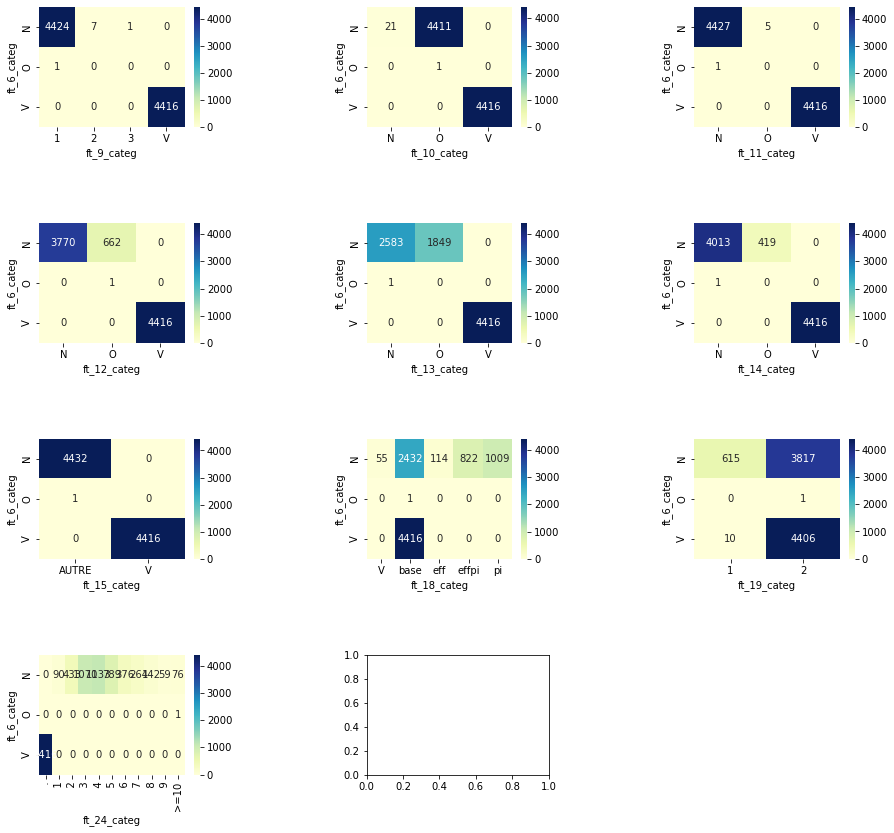

<Figure size 432x288 with 0 Axes>

In [150]:
# heatmap entre ft_6 et certaine variables, selection faites aussi à partir de notre exploration préalable des 
# données 

ft_columns=df.iloc[:,2:25].drop(['EXPO','superficief','ft_4_categ','ft_5_categ','ft_7_categ',
                                'ft_6_categ','ft_17_categ','ft_21_categ'
                                ,'ft_23_categ','Insee','decennie'],axis=1)

plt.figure(figsize=(15,30))
count=1
for col in ft_columns:
  #  plt.figure()
    sns.heatmap(pd.crosstab(df['ft_6_categ'],df[col]),annot=True,fmt='d', cmap="YlGnBu")
    plt.subplot(8,3,count)
    plt.subplots_adjust(hspace=0.8, wspace=0.8)
    count+=1
plt.figure();

**Synthèse de relations entre certaines variables, mettant en évidence des groupes au sein des enregistrements**

- Il semble que les variables ft_6 et ft_8 à ft_16 prennent pour 4416 enregistrements, soit près de la moitié de l'effectif,  la même valeur 'V'
- D'autre part, ces 4416 enregistrements correspondent à l'occurence '.' de la variable FT_24
- Ce groupe apparement homogène de 4416 enregistrements semble s'opposer à d'autres groupes moins homogènes

# #4

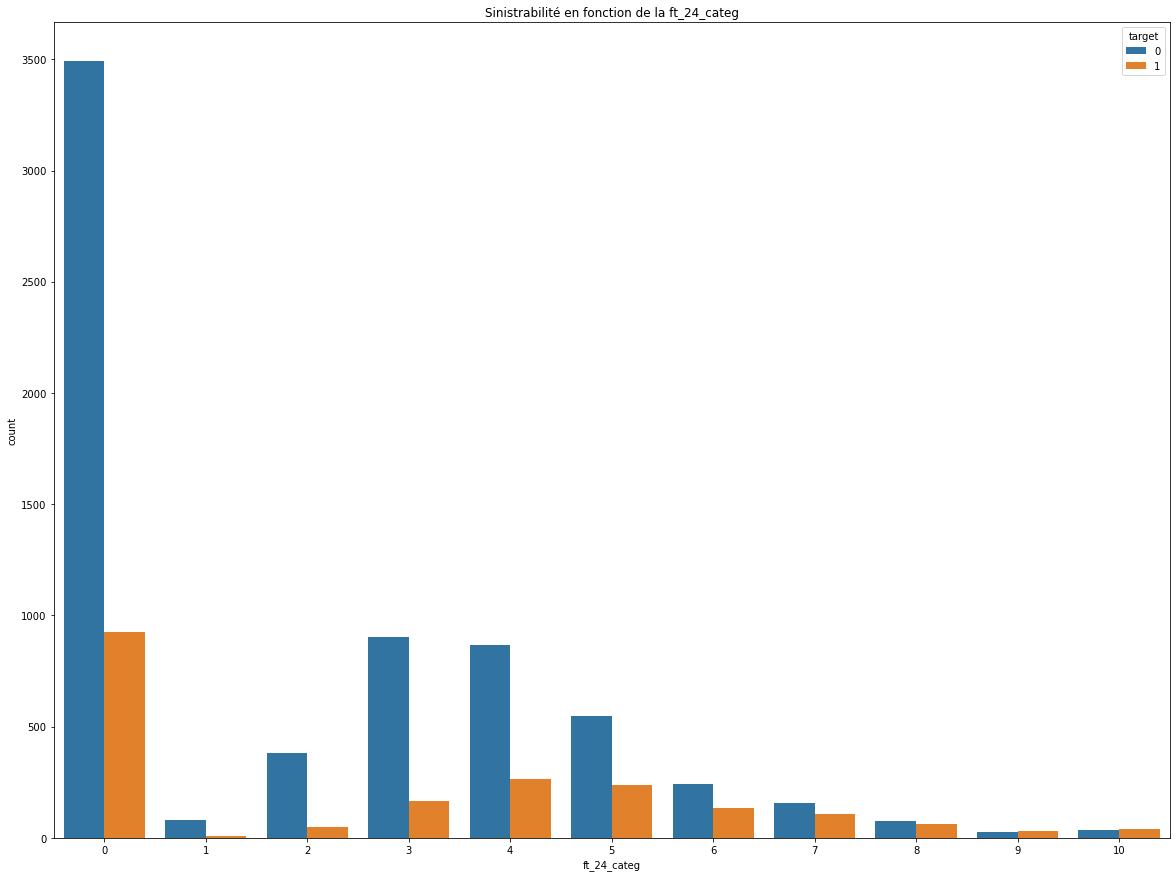

In [151]:
# validation de l'hypothèse Métier/Assurance de lien entre sinistralité et la variable qui pourrait etre l'étage (ft_24)

# transformation pour faciliter la lecture de la relation entre ft_24 et target

df.ft_24_categ = df.ft_24_categ.replace({'   .' : '0', '>=10' : '10'})
df.ft_24_categ = df.ft_24_categ.astype(int)

# distribution de cette variable ft_24 et ventilation suivant la valeur de la Target

fig=plt.figure(figsize=(20,15))
sns.countplot(data=df, x='ft_24_categ', hue='target')
plt.title('Sinistrabilité en fonction de la ft_24_categ');

In [152]:
# confirmation plus quantitative de la relation "proportionnelle" entre ft_24 et Target

pd.crosstab(df['ft_24_categ'], df['target'], normalize='index').round(2)

target,0,1
ft_24_categ,,
0,0.79,0.21
1,0.91,0.09
2,0.88,0.12
3,0.84,0.16
4,0.77,0.23
5,0.70,0.30
6,0.64,0.36
7,0.59,0.41
8,0.55,0.45


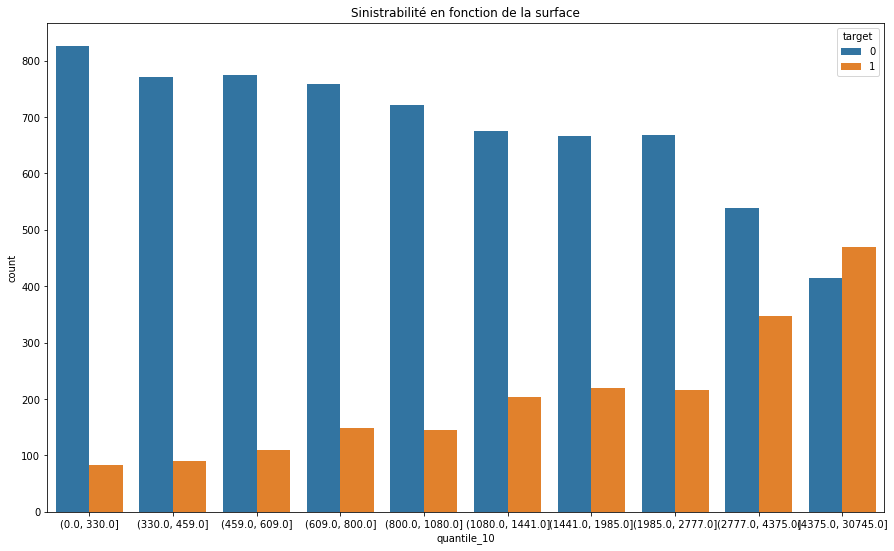

In [153]:
# validation de l'hypothèse Métier/Assurance de lien entre sinistralité et superficie
# avec une transformation pour faciliter la lecture de la relation entre superficie et target, par la création de quantiles

df['quantile_10'] = pd.qcut(df['superficief'], q=10, precision=0)

fig=plt.figure(figsize=(15,9))
sns.countplot(data=df, x='quantile_10', hue='target')
plt.title('Sinistrabilité en fonction de la surface');

In [154]:
# confirmation plus quantitative de la relation "proportionnelle" entre superficie et Target

pd.crosstab(df['quantile_10'], df['target'], normalize='index').round(2)

target,0,1
quantile_10,,
"(0.0, 330.0]",0.91,0.09
"(330.0, 459.0]",0.90,0.10
"(459.0, 609.0]",0.88,0.12
"(609.0, 800.0]",0.84,0.16
"(800.0, 1080.0]",0.83,0.17
"(1080.0, 1441.0]",0.77,0.23
"(1441.0, 1985.0]",0.75,0.25
"(1985.0, 2777.0]",0.76,0.24
"(2777.0, 4375.0]",0.61,0.39


**Test de chi2 pour confirmer l'approche graphique**

In [155]:
# contingence entre target et ft_24 supposée le nombre de fenetres / étages du batiment

table=pd.crosstab(df['target'],df['ft_24_categ'])

from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(table)
p_valeur = resultats_test[1]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print ("valeur de la p_value est : ", p_valeur)
print ("valeur du V de Cramer est : ", V_Cramer(table,df.shape[0]).round(3))

valeur de la p_value est :  1.194331993622861e-58
valeur du V de Cramer est :  0.181


In [156]:
# contingence entre target et ft_24 supposée nombre d'étages
table=pd.crosstab(df['target'],df['quantile_10'])

from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(table)
p_valeur = resultats_test[1]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print ("valeur de la p_value est : ", p_valeur)
print ("valeur du V de Cramer est : ", V_Cramer(table,df.shape[0]).round(3))

valeur de la p_value est :  3.2206623729699385e-179
valeur du V de Cramer est :  0.31


**L'approche graphique de relation entre target et les variables ft_24 et la superficie (approchée par le regroupement en classe de quantile) est donc confirmée par les tests de Chi-2**

**Enfin , une dernière étape de mise en bonne forme des données**

- Conversion des "fausses" numériques en catégorielles : FT_24 
- Suppression de quantile_10, nous n'utiliserons que superficief

In [157]:
df[['ft_24_categ']]= df[['ft_24_categ']].astype(str)

In [158]:
# sauvegarde du dataframe avant manipulations

df_init=df

# *Quatrième étape - Le pre processing*

- Séparation features/target
- Encodage des catégorielles
- Création Train/Test
- Standardisation


In [16]:
# séparation features/target, en éliminant Insee avant encodage des categorielles

data=df.drop(['target','Insee'], axis=1)
target=df['target']

In [17]:
# encodage des catégorielles

data_dum=pd.get_dummies(data)


In [18]:
# création des train et test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data_dum, target, test_size=0.2, random_state=121)

In [19]:
#vérification de la dimension du train set
proportion_train = round(len(y_train[y_train == 1])/len(y_train)*100, 2)
proportion_test = round(len(y_test[y_test == 1])/len(y_test)*100, 2)
print('Train case proportion: {}%'.format(proportion_train))
print('Test case proportion:  {}%'.format(proportion_test))
print('Difference entre test et train sets: {}%'.format(round(np.abs(proportion_train - proportion_test), 2)))


Train case proportion: 22.69%
Test case proportion:  24.12%
Difference entre test et train sets: 1.43%


In [20]:
# standardization de superficief par robust scaler, pour son insensibilité aux valeurs extrèmes (superficie)
from sklearn.preprocessing import StandardScaler
cols = ['superficief']
sc = StandardScaler()
X_train[cols]=sc.fit_transform(X_train[cols])
X_test[cols]=sc.transform(X_test[cols])


C:\Users\Maxime\anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Maxime\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Maxime\anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

# *Cinquième étape - La première modélisation*

- Explorer un premier **modèle basique**
- Sans recherche d'optimisation
- Pour obtenir la **performance plancher** à dépasser

# # Premier modèle : RFC

In [21]:
# performance de base

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=121, class_weight={0:1,1:2.33})
model.fit(X_train, y_train)
print("L'exactitude est :", model.score(X_test, y_test).round(3))

y_pred=model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.738


predites,0,1
réelle,,
0,1213,130
1,333,94


In [22]:
from sklearn.metrics import f1_score,confusion_matrix, classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1343
           1       0.42      0.22      0.29       427

    accuracy                           0.74      1770
   macro avg       0.60      0.56      0.56      1770
weighted avg       0.70      0.74      0.71      1770



Notre dataset étant déséquilbré avec une repartition 77/23 de target, ce modéle ayant une exactitude de 75,3 ne nous apporte rien

Les metriques sur la classe 0 sont très bonnes et très mauvaises sur la classe 1.

La précision est mauvaise à 48%, le rappel est faible 25%, F1 et moyenne geométrique faibles.


# # Deuxième modèle : DTC

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=121, class_weight={0:1,1:2.33})

model.fit(X_train, y_train)

print("L'exactitude est :", model.score(X_test, y_test).round(3))

y_pred=model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.684


predites,0,1
réelle,,
0,1060,283
1,277,150


In [24]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1343
           1       0.35      0.35      0.35       427

    accuracy                           0.68      1770
   macro avg       0.57      0.57      0.57      1770
weighted avg       0.69      0.68      0.68      1770



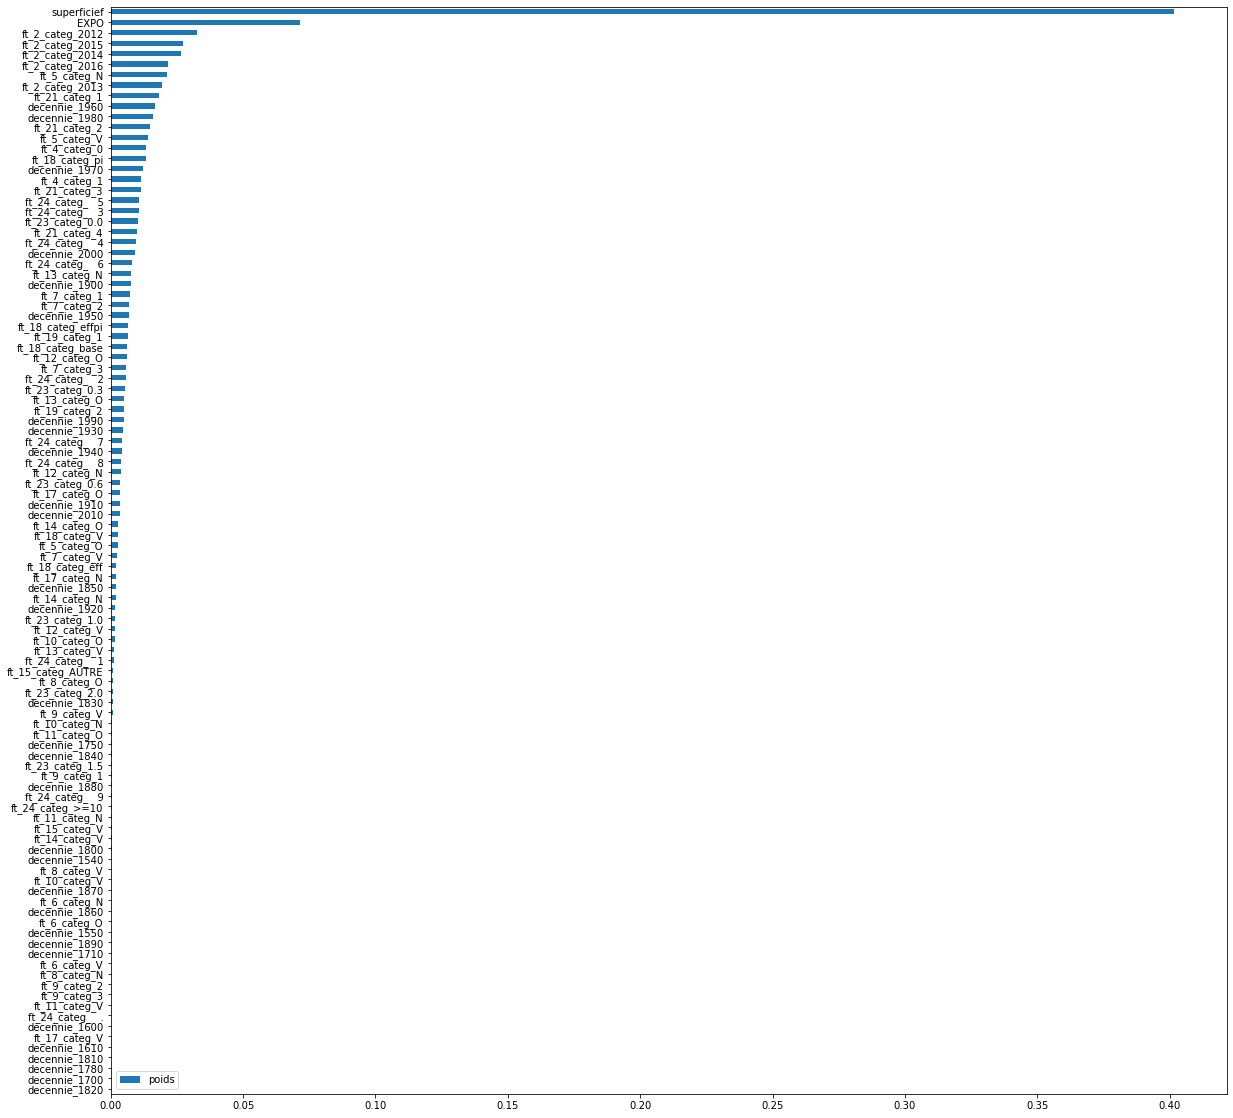

In [28]:
# réprésentation graphique ordonnée de l'importance des variabales

poids =pd.DataFrame(model.feature_importances_,X_train.columns, columns=['poids'])
poids.sort_values(by='poids', ascending=True).plot.barh(figsize=(20,20));


# # Troisième modèle : SVM

In [169]:
# performance de base
from sklearn.svm import SVC

model=SVC(random_state=121, class_weight={0:1,1:2.33})

model.fit(X_train, y_train)

print("L'exactitude est :", model.score(X_test, y_test).round(3))

y_pred=model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.76


predites,0,1
réelle,,
0,1153,190
1,234,193


In [170]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1343
           1       0.50      0.45      0.48       427

    accuracy                           0.76      1770
   macro avg       0.67      0.66      0.66      1770
weighted avg       0.75      0.76      0.76      1770



# # Quatrième modèle : XGBoost

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
model=GradientBoostingClassifier(random_state=123)

model.fit(X_train, y_train)

print("L'exactitude est :", model.score(X_test, y_test).round(3))

y_pred=model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.78


predites,0,1
réelle,,
0,1296,47
1,342,85


In [173]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1343
           1       0.64      0.20      0.30       427

    accuracy                           0.78      1770
   macro avg       0.72      0.58      0.59      1770
weighted avg       0.76      0.78      0.73      1770



# # Cinquième modèle : LRC

In [174]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=10000, random_state=121, class_weight={0:1,1:2.33})

model.fit(X_train, y_train)

print("L'exactitude est :", model.score(X_test, y_test).round(3))

y_pred=model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.75


predites,0,1
réelle,,
0,1127,216
1,226,201


In [175]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1343
           1       0.48      0.47      0.48       427

    accuracy                           0.75      1770
   macro avg       0.66      0.65      0.66      1770
weighted avg       0.75      0.75      0.75      1770



**Le meilleur des modèles envisagé est donc :**
- La classification par regression linéaire


**Et nous allons maintenant faire un pre processing plus approfondi, puis optimiser les hyper parametres**

# Sixième étape - La modélisation finale 
- A partir du modèle considéré comme le meilleur précédemment, le LRC
- Avec un préprocessing plus intégré
- Avec un tuning des hyperparamètres

In [176]:
# re creation des ensembles d'entrainement et de test

X_train2, X_test2, y_train2, y_test2=train_test_split(data, target, test_size=0.2, random_state=121)

In [177]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector 
from sklearn.model_selection import GridSearchCV

In [178]:
# séparation des numériques et des catégorielles

numerical=make_column_selector(dtype_include=np.number)
categorical=make_column_selector(dtype_exclude=np.number)

In [179]:
# définition des transformations sur variables

preprocessor = make_column_transformer((RobustScaler(), numerical),(OneHotEncoder(handle_unknown='ignore'),
                                                                    categorical))

In [180]:
# conception du modele composite et entrainement avec  correction du déséquilibre de classes

model = make_pipeline(preprocessor,
                      LogisticRegression(max_iter=10000, random_state=121, class_weight={0:1, 1:2.33}))
model.fit(X_train2, y_train2)

print("L'exactitude est :", model.score(X_test2, y_test2).round(3))

y_pred2=model.predict(X_test2)
pd.crosstab(y_test2, y_pred2, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.75


predites,0,1
réelle,,
0,1127,216
1,226,201


In [181]:
print(classification_report(y_test2,y_pred2))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1343
           1       0.48      0.47      0.48       427

    accuracy                           0.75      1770
   macro avg       0.66      0.65      0.66      1770
weighted avg       0.75      0.75      0.75      1770



In [182]:
# choix des valeurs possibles des hyperparamètres

params= {'logisticregression__penalty' : ['l1', 'l2'],
         'logisticregression__C' : [0.1,0.01,.09,1,5,25,40, 55,75],
         'logisticregression__solver' : ['liblinear', 'saga']}

In [183]:
# recherche des hyperparamètres optimum

grid= GridSearchCV (model, params,scoring='recall', cv=3)
grid.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('robustscaler',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb663113e90>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb663113b50>)])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 2

In [184]:
# affichage des meilleurs hyper paramètres

grid.best_params_

{'logisticregression__C': 40,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [185]:
# nouveau recall avec hyper paramètres optimisés

grid.score(X_test2, y_test2).round(2)


0.47

In [186]:
# sauvegarde du modèle optimum

optim=grid.best_estimator_

In [187]:
# affichage de la matrice de confusion issue du modèle optimum

y_pred2=optim.predict(X_test2)
pd.crosstab(y_test2, y_pred2, rownames=['réelle'], colnames=['predites'])


predites,0,1
réelle,,
0,1124,219
1,225,202


In [188]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1343
           1       0.48      0.47      0.48       427

    accuracy                           0.75      1770
   macro avg       0.66      0.66      0.66      1770
weighted avg       0.75      0.75      0.75      1770



**Conclusion de la modélisation avec notre dataset d'origine**

- La performance est modeste
- Les données de base sont difficiles à appréhender du fait de leur anonymisation
- Nous devons enrichir de données externes accessibles et que nous pensons pertinentes

# Septième étape - L'ajout de données pour enrichir notre dataset

Avec des données pouvant avoir un impact sur la survenance d'un sinistre

- Ajout de la population de la commune au sens Insee.
- Ajout du departement, de la superficie du departement, la population et la densité de population au M2.
- Ajout des interventions pompiers (incendies et risques technologique).
- Ajout du prix de l'immobilier au M2
- Ajout du nombre d'évenements CAT NAT

In [189]:
# importation du fichier Data. Gouv des communes
df_communes = pd.read_csv('Communes.csv',sep =';')
df_communes= df_communes.drop(['COM','PMUN','PCAP'],axis = 1)

df_communes = df_communes.rename(columns={'DEPCOM':'Insee'})
df_communes = df_communes.rename(columns={'PTOT':'Population'})
df_communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34995 entries, 0 to 34994
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Insee       34995 non-null  object
 1   Population  34995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 546.9+ KB


In [190]:
# augmentation de notre DataFrame d'origine avec la population des communes, clé = code Insee
df=df.merge(df_communes,on=['Insee'],how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8849 entries, 0 to 8848
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   target       8849 non-null   int64   
 1   ft_2_categ   8849 non-null   object  
 2   EXPO         8849 non-null   float64 
 3   ft_4_categ   8849 non-null   object  
 4   ft_5_categ   8849 non-null   object  
 5   ft_6_categ   8849 non-null   object  
 6   ft_7_categ   8849 non-null   object  
 7   ft_8_categ   8849 non-null   object  
 8   ft_9_categ   8849 non-null   object  
 9   ft_10_categ  8849 non-null   object  
 10  ft_11_categ  8849 non-null   object  
 11  ft_12_categ  8849 non-null   object  
 12  ft_13_categ  8849 non-null   object  
 13  ft_14_categ  8849 non-null   object  
 14  ft_15_categ  8849 non-null   object  
 15  ft_17_categ  8849 non-null   object  
 16  ft_18_categ  8849 non-null   object  
 17  ft_19_categ  8849 non-null   object  
 18  superficief  8849 non-null  

In [191]:
# On constate la présence de valeurs manquantes sur la variable ajoutée Population, 8764 vs 8849
# On remplace les valeurs manquantes par la moyenne de population du dataframe

df['Population']=df['Population'].fillna(df.Population.mean())

In [192]:
# Importation du fichier de correspondance entre codes Insee et Postaux
import geopandas as  gpd
communes=gpd.read_file('correspondance-code-insee-code-postal.geojson')
communes_insee=communes.rename(columns={'insee_com':'Insee'})

In [193]:
# on conserve les variables que l'on veut ajouter à notre dataframe

communes_insee = communes_insee.drop(['code_comm', 'nom_dept', 'statut', 'code_reg', 'nom_region', 'z_moyen',
        'postal_code', 'id_geofla','code_cant', 'nom_comm', 'code_arr', 'geometry'],axis=1)


In [194]:
# on intègre les variables supplémentaires avec la clé Insee

df=df.merge(communes_insee,on=['Insee'])
df = df.rename(columns={'population':'Densité M2'})


In [195]:
# création du dataframe des interventions pompier en 2012

df_pomp_2012 = pd.read_csv('interventions.csv', sep=';')
df_pomp_2012 = df_pomp_2012.drop([ 'Zone', 'R�gion', 'D�partement', 'Cat�gorie',
        'Secours � victime', 'Aides � personnes',
       'Secours � personne', 'Accidents de circulation',
        'Protection des biens', 'Divers',
       'Op�rations diverses', 'Total interventions'],axis=1)
df_pomp_2012 = df_pomp_2012.rename(columns={'Ann�e':'ft_2_categ'})
df_pomp_2012 = df_pomp_2012.rename(columns={'Num�ro':'code_dept'})
df_pomp_2012 =  df_pomp_2012.replace(to_replace=['BSPP'],value=[75])
df_pomp_2012 = df_pomp_2012.drop(df_pomp_2012[df_pomp_2012['code_dept']=='BMPM'].index)
df_pomp_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              97 non-null     int64 
 1   code_dept               97 non-null     object
 2   Incendies               97 non-null     int64 
 3   Risques technologiques  97 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


In [196]:
#On crée un dataframe additionnel pour 2012 en ajoutant les departements manquants
#On attribue aux variables de risque technologique et incendie pour les départements manquants par...
#...la moyenne des interventions constatées sur les autres départements
#On le combine au dataframe des interventions existantes

df_pomp_newline_2012 = pd.DataFrame({'ft_2_categ': [2012, 2012, 2012], 
                       'code_dept': ['92', '93', '94'], 
                       'Incendies': [round(df_pomp_2012['Incendies'].mean()),
                                     round(df_pomp_2012['Incendies'].mean()),
                                     round(df_pomp_2012['Incendies'].mean()) ], 
                       'Risques technologiques': [round(df_pomp_2012['Risques technologiques'].mean()),
                                                  round(df_pomp_2012['Risques technologiques'].mean()),
                                                  round(df_pomp_2012['Risques technologiques'].mean())]}, 
                               columns = ['ft_2_categ', 'code_dept', 'Incendies', 'Risques technologiques'])


df_pomp_2012= pd.concat([df_pomp_2012,df_pomp_newline_2012],ignore_index=True)


In [197]:
# création du dataframe des interventions pompier en 2013

df_pomp_2013 = pd.read_csv('interventions2013.csv', sep=';')
df_pomp_2013 = df_pomp_2013.drop([ 'Zone', 'R�gion', 'D�partement', 'Cat�gorie',
        'Secours � victime', 'Aides � personne',
       'Secours � personne', 'Accidents de circulation',
        'Protection des biens', 'Divers',
        'Op�rations diverses', 'Total interventions'],axis=1)
df_pomp_2013 = df_pomp_2013.rename(columns={'Ann�e':'ft_2_categ'})
df_pomp_2013 = df_pomp_2013.rename(columns={'Num�ro':'code_dept'})
df_pomp_2013 =  df_pomp_2013.replace(to_replace=['BSPP'],value=[75])
df_pomp_2013 = df_pomp_2013.drop(df_pomp_2013[df_pomp_2013['code_dept']=='BMPM'].index)
df_pomp_2013.Incendies= df_pomp_2013.Incendies.str.replace(' ', '')
df_pomp_2013.Incendies= df_pomp_2013.Incendies.astype('int')
df_pomp_2013['Risques technologiques']= df_pomp_2013['Risques technologiques'].str.replace(' ', '')
df_pomp_2013['Risques technologiques']= df_pomp_2013['Risques technologiques'].astype('int')
df_pomp_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              97 non-null     int64 
 1   code_dept               97 non-null     object
 2   Incendies               97 non-null     int64 
 3   Risques technologiques  97 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


In [198]:
#On creer un dataframe additionnel pour 2013 en ajoutant les departements manquants
#On attribue aux variables de risque technologique et incendie pour les départements manquants par...
#...la moyenne des interventions constatées sur les autres départements
#On le combine au dataframe des interventions existantes

df_pomp_newline_2013 = pd.DataFrame({'ft_2_categ': [2013, 2013, 2013], 
                       'code_dept': ['92','93','94'], 
                       'Incendies': [round(df_pomp_2013['Incendies'].mean()),
                                     round(df_pomp_2013['Incendies'].mean()),
                                     round(df_pomp_2013['Incendies'].mean()) ], 
                       'Risques technologiques': [round(df_pomp_2013['Risques technologiques'].mean()),
                                                  round(df_pomp_2013['Risques technologiques'].mean()),
                                                  round(df_pomp_2013['Risques technologiques'].mean())]}, 
                               columns = ['ft_2_categ', 'code_dept', 'Incendies', 'Risques technologiques'])


df_pomp_2013= pd.concat([df_pomp_2013,df_pomp_newline_2013],ignore_index=True)

df_pomp_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              100 non-null    int64 
 1   code_dept               100 non-null    object
 2   Incendies               100 non-null    int64 
 3   Risques technologiques  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [199]:
# création du dataframe des interventions pompier en 2014

df_pomp_2014 = pd.read_csv('interventions2014.csv', sep=';')
df_pomp_2014 = df_pomp_2014.drop([ 'Zone', 'R�gion', 'D�partement', 'Cat�gorie',
       "Feux d'habitations-bureaux", 'dont feux de chemin�es',
       "Feux d'ERP avec local � sommeil", "Feux d'ERP sans local � sommeil",
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de v�hicules', 'Feux de v�g�tations', 'Autres feux',
       'Accidents sur lieux de travail', 'Accidents � domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises � domicile : urgence vitale', 'Malaises � domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux int�rieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours � victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides � personne', 'Secours � personne', 'Accidents routiers',
       'Accidents ferroviaires', 'Accidents a�riens',
       'Accidents de navigation', 'Accidents de t�l�portage',
       'Accidents de circulation', 'Odeurs - fuites de gaz',
       'Odeurs (autres que gaz)', "Fait dus � l'�lectricit�",
       'Pollutions - contaminations', 'Autres risques technologiques',
        "Fuites d'eau", 'Inondations',
       'Ouvertures de portes', "Recherches d'objets", 'Bruits suspects',
       'Protection des biens', 'Fausses alertes', 'dont T�l�alarmes',
       "Faits d'animaux (hors hym�nopt�res)", 'Hym�nopt�res',
       'D�gagements de voies publiques', 'Nettoyages de voies publiques',
       '�boulements', "D�poses d'objets",
       'Piquets de s�curit� - surveillances', 'Engins explosifs',
       'Autres op�rations diverses', 'Divers', 'Op�rations diverses',
       'Total interventions'],axis=1)
df_pomp_2014 = df_pomp_2014.rename(columns={'Ann�e':'ft_2_categ'})
df_pomp_2014 = df_pomp_2014.rename(columns={'Num�ro':'code_dept'})
df_pomp_2014 =  df_pomp_2014.replace(to_replace=['BSPP'],value=[75])
df_pomp_2014 = df_pomp_2014.drop(df_pomp_2014[df_pomp_2014['code_dept']=='BMPM'].index)
df_pomp_2014.Incendies= df_pomp_2014.Incendies.str.replace(' ', '')
df_pomp_2014.Incendies= df_pomp_2014.Incendies.astype('int')
df_pomp_2014['Risques technologiques']= df_pomp_2014['Risques technologiques'].str.replace(' ', '')
df_pomp_2014['Risques technologiques']= df_pomp_2014['Risques technologiques'].astype('int')


In [200]:
#On crée un dataframe additionnel pour 2014 en ajoutant les departements manquants
#On attribue aux variables de risque technologique et incendie pour les départements manquants par...
#...la moyenne des interventions constatées sur les autres départements
#On le combine au dataframe des interventions existantes

df_pomp_newline_2014 = pd.DataFrame({'ft_2_categ': [2014, 2014, 2014], 
                       'code_dept': ['92','93','94'], 
                       'Incendies': [round(df_pomp_2014['Incendies'].mean()),
                                     round(df_pomp_2014['Incendies'].mean()),
                                     round(df_pomp_2014['Incendies'].mean()) ], 
                       'Risques technologiques': [round(df_pomp_2014['Risques technologiques'].mean()),
                                                  round(df_pomp_2014['Risques technologiques'].mean()),
                                                  round(df_pomp_2014['Risques technologiques'].mean())]}, 
                               columns = ['ft_2_categ', 'code_dept', 'Incendies', 'Risques technologiques'])

#df_pomp_newline_2014['code_dept']= df_pomp_newline_2014['code_dept'].astype('object')

df_pomp_2014= pd.concat([df_pomp_2014,df_pomp_newline_2014],ignore_index=True)

df_pomp_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              101 non-null    int64 
 1   code_dept               101 non-null    object
 2   Incendies               101 non-null    int64 
 3   Risques technologiques  101 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [201]:
# création du dataframe des interventions pompier en 2015

df_pomp_2015= pd.read_csv('interventions2015.csv', sep=';')
df_pomp_2015 = df_pomp_2015.drop([ 'Zone', 'R�gion', 'D�partement', 'Cat�gorie',
       "Feux d'habitations-bureaux", 'dont feux de chemin�es',"Feux d'ERP avec local � sommeil",
       "Feux d'ERP sans local � sommeil",
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de v�hicules', 'Feux de v�g�tations', 'Autres feux',
       'Accidents sur lieux de travail', 'Accidents � domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises � domicile : urgence vitale', 'Malaises � domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux int�rieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours � victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides � personne', 'Secours � personne', 'Accidents routiers',
       'Accidents ferroviaires', 'Accidents a�riens',
       'Accidents de navigation', 'Accidents de t�l�portage',
       'Accidents de circulation', 'Odeurs - fuites de gaz',
       'Odeurs (autres que gaz)', "Fait dus � l'�lectricit�",
       'Pollutions - contaminations', 'Autres risques technologiques',
        "Fuites d'eau", 'Inondations',
       'Ouvertures de portes', "Recherches d'objets", 'Bruits suspects',
       'Protection des biens', 'Fausses alertes', 'dont T�l�alarmes',
       "Faits d'animaux (hors hym�nopt�res)", 'Hym�nopt�res',
       'D�gagements de voies publiques', 'Nettoyages de voies publiques',
       '�boulements', "D�poses d'objets",
       'Piquets de s�curit� - surveillances', 'Engins explosifs',
       'Autres op�rations diverses', 'Divers', 'Op�rations diverses',
       'Total interventions'],axis=1)
df_pomp_2015 = df_pomp_2015.rename(columns={'Ann�e':'ft_2_categ'})
df_pomp_2015 = df_pomp_2015.rename(columns={'Num�ro':'code_dept'})
df_pomp_2015 =  df_pomp_2015.replace(to_replace=['BSPP'],value=[75])
df_pomp_2015 = df_pomp_2015.drop(df_pomp_2015[df_pomp_2015['code_dept']=='BMPM'].index)
df_pomp_2015.Incendies= df_pomp_2015.Incendies.str.replace(' ', '')
df_pomp_2015.Incendies= df_pomp_2015.Incendies.astype('int')
df_pomp_2015['Risques technologiques']= df_pomp_2015['Risques technologiques'].str.replace(' ', '')
df_pomp_2015['Risques technologiques']= df_pomp_2015['Risques technologiques'].astype('int')
df_pomp_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              98 non-null     int64 
 1   code_dept               98 non-null     object
 2   Incendies               98 non-null     int64 
 3   Risques technologiques  98 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


In [202]:
#On crée un dataframe additionnel pour 2015 en ajoutant les departements manquants
#On attribue aux variables de risque technologique et incendie pour les départements manquants par...
#...la moyenne des interventions constatées sur les autres départements
#On le combine au dataframe des interventions existantes

df_pomp_newline_2015 = pd.DataFrame({'ft_2_categ': [2015, 2015, 2015], 
                       'code_dept': ['92','93','94'], 
                       'Incendies': [round(df_pomp_2015['Incendies'].mean()),
                                     round(df_pomp_2015['Incendies'].mean()),
                                     round(df_pomp_2015['Incendies'].mean()) ], 
                       'Risques technologiques': [round(df_pomp_2015['Risques technologiques'].mean()),
                                                  round(df_pomp_2015['Risques technologiques'].mean()),
                                                  round(df_pomp_2015['Risques technologiques'].mean())]}, 
                               columns = ['ft_2_categ', 'code_dept', 'Incendies', 'Risques technologiques'])

#df_pomp_newline_2015['code_dept']= df_pomp_newline_2015['code_dept'].astype('object')

df_pomp_2015= pd.concat([df_pomp_2015,df_pomp_newline_2015],ignore_index=True)

df_pomp_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              101 non-null    int64 
 1   code_dept               101 non-null    object
 2   Incendies               101 non-null    int64 
 3   Risques technologiques  101 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [203]:
# et enfin création du dataframe des interventions pompier en 2016
df_pomp_2016 = pd.read_csv('interventions2016.csv', sep=';')
df_pomp_2016 = df_pomp_2016.drop([ 'Zone', 'R�gion', 'D�partement', 'Cat�gorie',
       "Feux d'habitations-bureaux", 'dont feux de chemin�es',
       "Feux d'ERP avec local � sommeil", "Feux d'ERP sans local � sommeil",
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de v�hicules', 'Feux de v�g�tations', 'Autres feux',
       'Accidents sur lieux de travail', 'Accidents � domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises � domicile : urgence vitale', 'Malaises � domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux int�rieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours � victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides � personne', 'Secours � personne', 'Accidents routiers',
       'Accidents ferroviaires', 'Accidents a�riens',
       'Accidents de navigation', 'Accidents de t�l�portage',
       'Accidents de circulation', 'Odeurs - fuites de gaz',
       'Odeurs (autres que gaz)', "Fait dus � l'�lectricit�",
       'Pollutions - contaminations', 'Autres risques technologiques',
        "Fuites d'eau", 'Inondations',
       'Ouvertures de portes', "Recherches d'objets", 'Bruits suspects',
       'Protection des biens', 'Fausses alertes',
       "Faits d'animaux (hors hym�nopt�res)", 'Hym�nopt�res',
       'D�gagements de voies publiques', 'Nettoyages de voies publiques',
       '�boulements', "D�poses d'objets",
       'Piquets de s�curit� - surveillances', 'Engins explosifs',
       'Autres op�rations diverses', 'Divers', 'Op�rations diverses',
       'Total interventions','dont fausses alertes DAAF'],axis=1)
df_pomp_2016 = df_pomp_2016.rename(columns={'Ann�e':'ft_2_categ'})
df_pomp_2016 = df_pomp_2016.rename(columns={'Num�ro':'code_dept'})
df_pomp_2016 =  df_pomp_2016.replace(to_replace=['BSPP'],value=[75])
df_pomp_2016 = df_pomp_2016.drop(df_pomp_2016[df_pomp_2016['code_dept']=='BMPM'].index)
df_pomp_2016.Incendies= df_pomp_2016.Incendies.str.replace(' ', '')
df_pomp_2016.Incendies= df_pomp_2016.Incendies.astype('int')
df_pomp_2016['Risques technologiques']= df_pomp_2016['Risques technologiques'].str.replace(' ', '')
df_pomp_2016['Risques technologiques']= df_pomp_2016['Risques technologiques'].astype('int')
df_pomp_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              98 non-null     int64 
 1   code_dept               98 non-null     object
 2   Incendies               98 non-null     int64 
 3   Risques technologiques  98 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


In [204]:
#On crée un dataframe additionnel pour 2016 en ajoutant les departements manquants
#On attribue aux variables de risque technologique et incendie pour les départements manquants par...
#...la moyenne des interventions constatées sur les autres départements
#On le combine au dataframe des interventions existantes

df_pomp_newline_2016 = pd.DataFrame({'ft_2_categ': [2016, 2016, 2016], 
                       'code_dept': ['92','93','94'], 
                       'Incendies': [round(df_pomp_2016['Incendies'].mean()),
                                     round(df_pomp_2016['Incendies'].mean()),
                                     round(df_pomp_2016['Incendies'].mean()) ], 
                       'Risques technologiques': [round(df_pomp_2016['Risques technologiques'].mean()),
                                                  round(df_pomp_2016['Risques technologiques'].mean()),
                                                  round(df_pomp_2016['Risques technologiques'].mean())]}, 
                               columns = ['ft_2_categ', 'code_dept', 'Incendies', 'Risques technologiques'])

#df_pomp_newline_2016['code_dept']= df_pomp_newline_2016['code_dept'].astype('object')

df_pomp_2016= pd.concat([df_pomp_2016,df_pomp_newline_2016],ignore_index=True)

df_pomp_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              101 non-null    int64 
 1   code_dept               101 non-null    object
 2   Incendies               101 non-null    int64 
 3   Risques technologiques  101 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [205]:
# création du dataset pompiers complet (de 2012 à 2016)
df_pomp= pd.concat([df_pomp_2012,df_pomp_2013],ignore_index=True)
df_pomp=pd.concat([df_pomp,df_pomp_2014],ignore_index=True)
df_pomp=pd.concat([df_pomp,df_pomp_2015],ignore_index=True)
df_pomp=pd.concat([df_pomp,df_pomp_2016],ignore_index=True)

df_pomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ft_2_categ              503 non-null    int64 
 1   code_dept               503 non-null    object
 2   Incendies               503 non-null    int64 
 3   Risques technologiques  503 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [206]:
#transformation des dept 2a et 2b en 2A et 2B et modification des chiffres en nombres pour permettre la fusion

df_pomp['code_dept'] = df_pomp['code_dept'].replace('2a','2A')
df_pomp['code_dept'] = df_pomp['code_dept'].replace('2b','2B')     

df_pomp['code_dept'] = df_pomp['code_dept'].replace(['1','2','3','4','5','6','7','8','9'],
                                                    ['01','02','03','04','05','06','07','08','09'])

In [207]:
# transformation du type de ft_2_categ
df_pomp[['ft_2_categ']]= df[['ft_2_categ']].astype('object')

# cleaning des doublons
df_pomp.drop_duplicates(inplace=True)

# création du dataframe augmenté du nombre d'interventions incendies et risques technologiques par département

df1 = pd.merge(df,df_pomp,on=['code_dept','ft_2_categ'])

In [208]:
# création du dataframe à partir des données externes de prix au M2
dfpmc=pd.read_csv('dvf-communes-2019.csv',sep=';')
dfpmc = dfpmc.drop([ 'ID', 'INSEE_DEP', 'INSEE_REG', 'CODE_EPCI',
        'NOM_COM_M', 'Nb_Ventes', 'POPULATION'],axis=1)
dfpmc = dfpmc.rename(columns={'INSEE_COM':'Insee'})
dfpmc = dfpmc.fillna(dfpmc.mean().round(2))


In [209]:
# enrichissement du dataframe des valeurs des prix au M2

df2 = pd.merge(df1,dfpmc,on=['Insee'],how='left')


In [210]:
#On remplace les valeurs manquantes de prix au M2 par le prix moyen au M2
df2['PrixMoyen_M2']=df2['PrixMoyen_M2'].fillna(df2['PrixMoyen_M2'].mean())


In [211]:
# création  du dataframe à partir des données externes du nombre d'évènements de type CatNat par code Insee

df3=pd.read_csv("Nb evenement Cat Nat.csv", sep=';')


In [212]:
# enrichissement du dataframe du nombre d'évènements de tyep CatNat

df4 = df2.merge(df3, on=['Insee'], how='left')

# remplacement des valeurs manquantes par la moyenne constatée par ailleurs

df4['nb_evenement']=df4['nb_evenement'].fillna(df4['nb_evenement'].mean())



In [213]:
# séparation de la target et des variables explicatives

data=df4.drop(['target','Insee'], axis=1)
target=df4['target']

In [214]:
# re-création des ensembles d'entrainement et de test

X_train3, X_test3, y_train3, y_test3=train_test_split(data, target, test_size=0.2, random_state=121)

In [215]:
# séparation des numériques et des catégorielles
numerical=make_column_selector(dtype_include=np.number)
categorical=make_column_selector(dtype_exclude=np.number)

In [216]:
# définition des transformations sur variables
preprocessor = make_column_transformer((RobustScaler(), numerical),(OneHotEncoder(handle_unknown='ignore'),
                                                                    categorical))

In [217]:
# conception du modele composite et entrainement avec  corection du déséquilibre de classes
model = make_pipeline(preprocessor,
                      LogisticRegression(max_iter=10000, random_state=121, class_weight={0:1, 1:2.33}))
model.fit(X_train3, y_train3)

print("L'exactitude est :", model.score(X_test3, y_test3).round(3))

y_pred3=model.predict(X_test3)
pd.crosstab(y_test3, y_pred3, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.756


predites,0,1
réelle,,
0,1120,222
1,206,207


In [218]:
print(classification_report(y_test3,y_pred3))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1342
           1       0.48      0.50      0.49       413

    accuracy                           0.76      1755
   macro avg       0.66      0.67      0.67      1755
weighted avg       0.76      0.76      0.76      1755



In [219]:
# choix des valeurs possibles des hyperparamètres
params= {'logisticregression__penalty' : ['l1', 'l2'],
         'logisticregression__C' : [0.1,0.01,.09,1,5,25,40, 55,75],
         'logisticregression__solver' : ['liblinear', 'saga']}

In [220]:
# recherche des hyperparamètres optimum

grid= GridSearchCV (model, params,scoring='recall', cv=3)
grid.fit(X_train3, y_train3)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('robustscaler',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb671568e90>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb671568fd0>)])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 2

In [232]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1342
           1       0.48      0.50      0.49       413

    accuracy                           0.76      1755
   macro avg       0.66      0.67      0.67      1755
weighted avg       0.76      0.76      0.76      1755



**Les performances restent tres décevantes.**

Le recall de la classe 1 avec l'ajout de données est passé de 0,47 à 0,50


# Etape Bonus : aggrégation des lignes correspondant à un même immeuble
- Nous avions constaté que certains immeubles pouvaient etre assurés plusieurs années, chacune correspondant à une ligne
- Si nous regroupions ces lignes en une seule en sommant les Expo et en considérant la Target à 1 si au moins sur une des années assurées, l'immeuble avait subi un sinistre, nous aurions peut être un résultat différent
- Nous sommes parti du data frame de départ (df_init) pour le regroupement de lignes, et avons appliqué un GridSearch sur LRC pour comparer avec les performances obtenues à la fin de la cinquième étape

In [221]:
# estimation du nombre d'enregistrements de type doublons 
test=df_init[df_init.iloc[:,3:-2].duplicated()==True]
print(test.shape)

(1715, 25)


In [222]:
# création d'une variable d'agregation fusionnant les colonnes descriptives des immeubles, après avoir eliminé decennie
df3=df_init.drop('quantile_10', axis=1)
df3['superficief']=df3['superficief'].astype('str')

df3['group'] = df3['ft_4_categ']+df3['ft_5_categ']+df3['ft_6_categ']+df3['ft_7_categ']+df3['ft_8_categ']+df3['ft_9_categ']+df3['ft_10_categ']+df3['ft_11_categ']+df3['ft_12_categ']+df3['ft_13_categ']+df3['ft_14_categ']+df3['ft_15_categ']+df3['ft_17_categ']+df3['ft_18_categ']+df3['ft_19_categ']+df3['superficief']+df3['ft_21_categ']+df3['ft_23_categ']+df3['ft_24_categ']+df3['Insee']+df3['decennie']

In [223]:
# enchaînement d'opérations pour agréger les lignes, en calculant un Expo globale

df4=df3.groupby('group').agg({'EXPO':'sum', 'target' :'sum'})
df3=df3.drop(['EXPO', 'target','ft_2_categ'], 1)
df5=df4.merge(df3, on='group', how='right')
df6=df5.drop_duplicates(keep='first')
# étape de recalcul de la target ne pouvant pas dépasser 1
df6['target'].replace([6,5,4,3, 2], 1, inplace=True)

/Users/jean-baptistevidal/opt/anaconda3/envs/env_geo/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [224]:
# séparation de la target et des variables explicatives

data=df6.drop(['target', 'group'], axis=1)
target=df6['target']

In [225]:
# re-création des ensembles d'entrainement et de test

X_train6, X_test6, y_train6, y_test6=train_test_split(data, target, test_size=0.2, random_state=121)

In [226]:
# séparation des numériques et des catégorielles

numerical=make_column_selector(dtype_include=np.number)
categorical=make_column_selector(dtype_exclude=np.number)

In [227]:
# définition des transformations sur variables

preprocessor = make_column_transformer((RobustScaler(), numerical),(OneHotEncoder(handle_unknown='ignore'),
                                                                    categorical))

In [228]:
# conception du modele composite et entrainement avec  corection du déséquilibre de classes
model = make_pipeline(preprocessor,
                      LogisticRegression(max_iter=10000, random_state=121, class_weight={0:1, 1:2.33}))
model.fit(X_train6, y_train6)

print("L'exactitude est :", model.score(X_test6, y_test6).round(3))

y_pred6=model.predict(X_test6)
pd.crosstab(y_test6, y_pred6, rownames=['réelle'], colnames=['predites'])


L'exactitude est : 0.686


predites,0,1
réelle,,
0,808,229
1,220,174


In [229]:
print(classification_report(y_test6,y_pred6))


              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1037
           1       0.43      0.44      0.44       394

    accuracy                           0.69      1431
   macro avg       0.61      0.61      0.61      1431
weighted avg       0.69      0.69      0.69      1431



**Cette approche** ne considérant pas les immeubles assurés plusieurs années comme des individus indépendants, ne donne pas de meilleurs résultats